# Loan Approval Prediction

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

Dataset link : https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset

In [4]:
# reading dataset

data=pd.read_csv(r"C:\Users\dasav\Vamsi Reddy\datasets/train_u6lujuX_CVtuZ9i.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.shape

(614, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data.size

7982

In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
# finding null values
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
data.fillna(method='ffill',inplace=True)

In [14]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
data['Dependents'].value_counts()

0     354
2     105
1     104
3+     51
Name: Dependents, dtype: int64

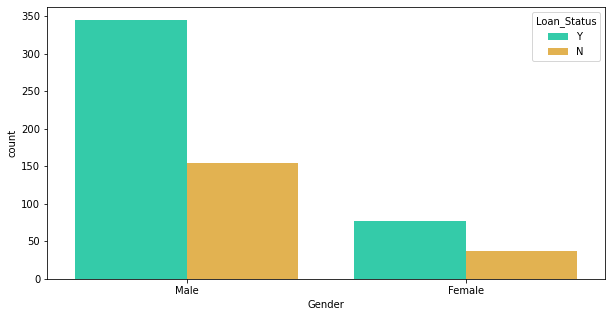

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=data,hue='Loan_Status',palette='turbo')
plt.show()

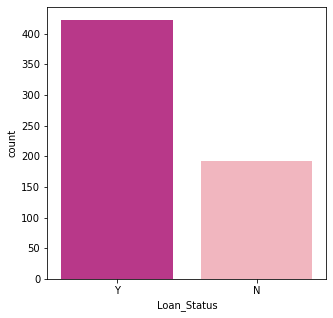

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x='Loan_Status',data=data,palette='RdPu_r')
plt.show()

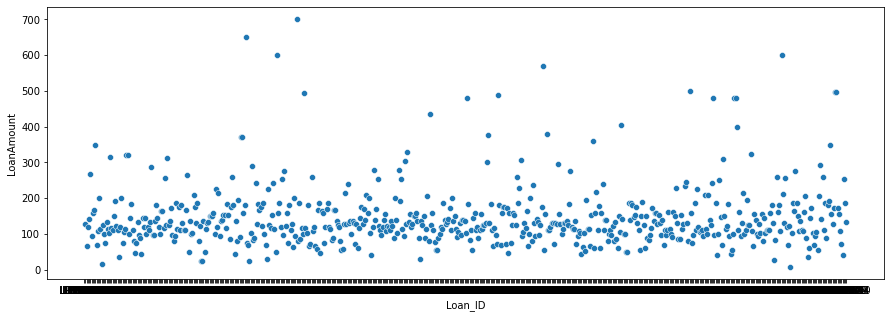

In [22]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="Loan_ID",y="LoanAmount",data=data)
plt.show()

<Figure size 720x360 with 0 Axes>

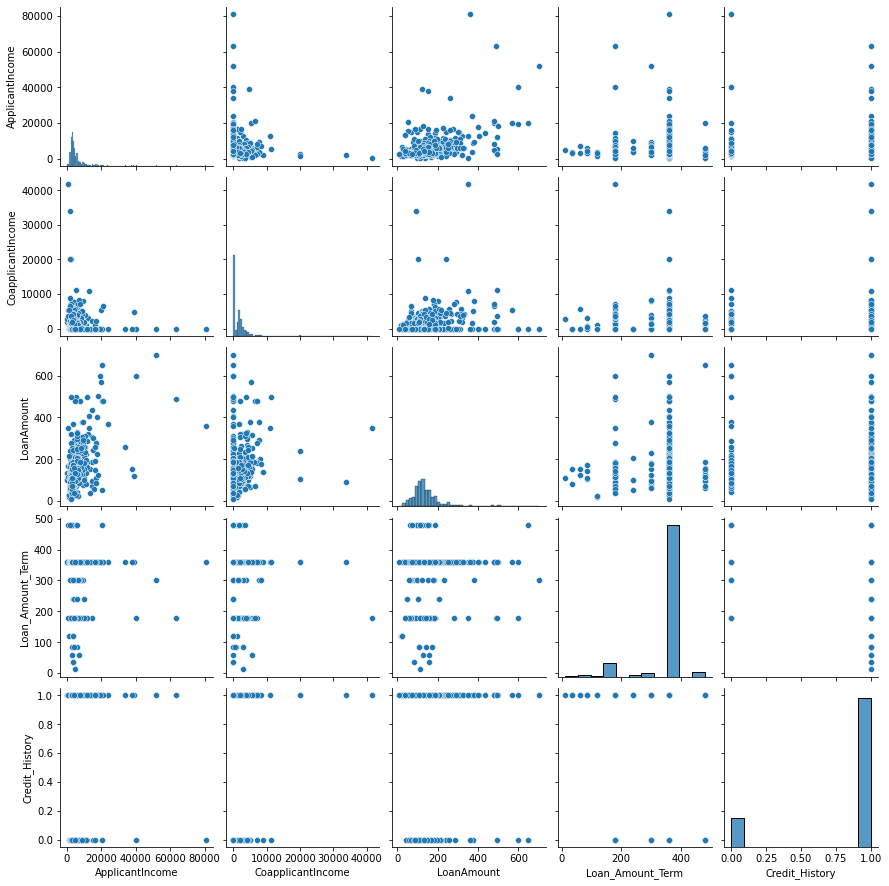

In [23]:
plt.figure(figsize=(10,5))
sns.pairplot(data)
plt.show()

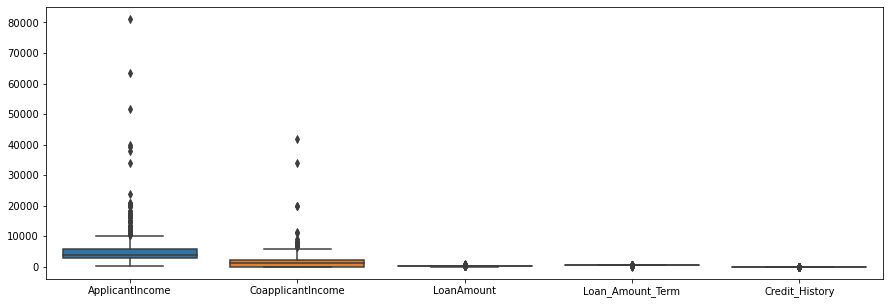

In [27]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data)
plt.show()

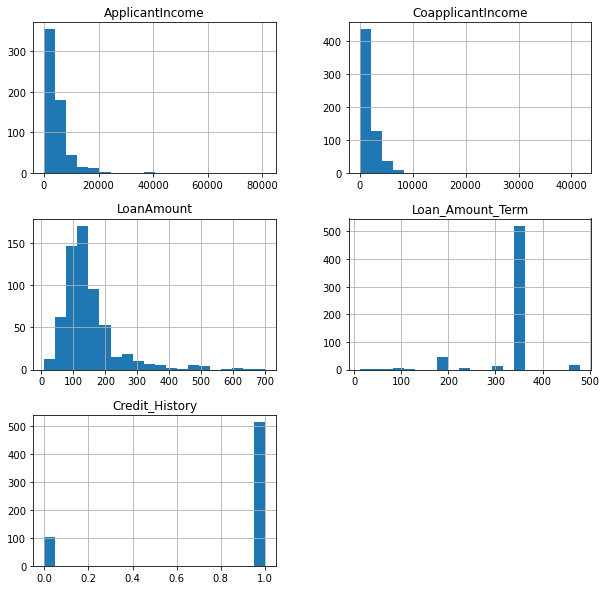

In [28]:
data.hist(figsize = (10, 10), bins = 20, legend = False)
plt.show()

<AxesSubplot:ylabel='None'>

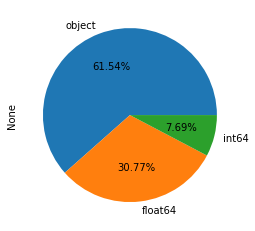

In [29]:
data.dtypes.value_counts().plot.pie(autopct='%0.2f%%')

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

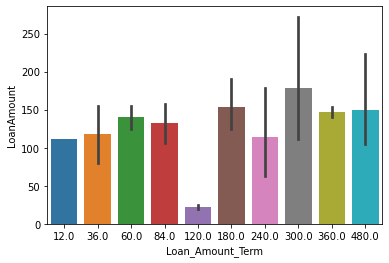

In [32]:
sns.barplot(x=data['Loan_Amount_Term'],y=data['LoanAmount'])

In [34]:
#Removing unwanted columns in the dataset
data.drop('Dependents',axis=1,inplace=True)
data.drop('ApplicantIncome',axis=1,inplace=True)
data.drop('CoapplicantIncome',axis=1,inplace=True)
data.drop('LoanAmount',axis=1,inplace=True)
data.drop('Loan_Amount_Term',axis=1,inplace=True)
data.drop('Credit_History',axis=1,inplace=True)

In [35]:
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y


In [36]:
#Encoding using get_dummies OneHotEncoder
data1=pd.get_dummies(data,columns=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"])
data1.head()

,Loan_ID,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,LP001002,0,1,1,0,1,0,1,0,0,0,1,0,1
1,LP001003,0,1,0,1,1,0,1,0,1,0,0,1,0
2,LP001005,0,1,0,1,1,0,0,1,0,0,1,0,1
3,LP001006,0,1,0,1,0,1,1,0,0,0,1,0,1
4,LP001008,0,1,1,0,1,0,1,0,0,0,1,0,1


In [37]:
data1.drop('Gender_Female',axis=1,inplace=True)
data1.drop('Married_No',axis=1,inplace=True)
data1.drop('Education_Graduate',axis=1,inplace=True)
data1.drop('Self_Employed_No',axis=1,inplace=True)
data1.drop('Property_Area_Rural',axis=1,inplace=True)
data1.drop('Loan_Status_N',axis=1,inplace=True)

In [38]:
data1.head()

,Loan_ID,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,1,0,0,0,0,1,1
1,LP001003,1,1,0,0,0,0,0
2,LP001005,1,1,0,1,0,1,1
3,LP001006,1,1,1,0,0,1,1
4,LP001008,1,0,0,0,0,1,1


In [39]:
#Splitting our data into training and testing
X = data1[["Gender_Male","Married_Yes","Education_Not Graduate","Self_Employed_Yes","Property_Area_Semiurban","Property_Area_Urban"]].values
y=data1["Loan_Status_Y"].values

In [43]:
X

array([[1, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1],
       ...,
       [1, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 0]], dtype=uint8)

In [44]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [45]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)



In [47]:
from sklearn.linear_model import LogisticRegression 
LR=LogisticRegression()
LR.fit(xtrain,ytrain)
predict_values=LR.predict(xtest)

In [49]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix 
print("Logistic Regression :")
print(" accuracy is ",accuracy_score(ytest,predict_values))
print(" precision score is ",precision_score(ytest,predict_values))
print(" recall is ",recall_score(ytest,predict_values))
print(" f1 score is ",f1_score(ytest,predict_values))
print("                                                                                                              ")
print(" classification report is ",classification_report(ytest,predict_values))
print(" confusion matrix is ",confusion_matrix(ytest,predict_values))

Logistic Regression :
 accuracy is  0.7154471544715447
 precision score is  0.7310924369747899
 recall is  0.9666666666666667
 f1 score is  0.832535885167464
                                                                                                              
 classification report is                precision    recall  f1-score   support

           0       0.25      0.03      0.05        33
           1       0.73      0.97      0.83        90

    accuracy                           0.72       123
   macro avg       0.49      0.50      0.44       123
weighted avg       0.60      0.72      0.62       123

 confusion matrix is  [[ 1 32]
 [ 3 87]]
